<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_YB_WEEK05_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# < 분류 >

지도학습은 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

지도학습의 대표적인 유형인 분류(Classification)는 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것

즉, 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것

- 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
- 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
- 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
- 심층 연결 기반의 신경망(Neural Network)
- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

앙상블은 서로 다른/또는 같은 알고리즘을 단순히 결합한 형태도 있으나, 일반적으로는 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉨

배깅 방식의 대표인 랜덤 포레스트(Random Forest)는 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용하는 알고리즘

앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정트리

결정트리는 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음

하지만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합(overfitting)이 발생해 반대로 예측 성능이 저하될 수도 있다는 단점 존재

하지만 이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용

앙상블은 매우 많은 여러 개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 약한 학습기가 되기 때문

# **2. 결정트리**

결정트리 알고리즘 : 데이터에 있는 규칙을 학습을 통해 자동을 찾아내 트리 기반의 분류 규칙을 만드는 것

규칙을 가장 쉽게 표현하는 방법은 if/else 기반으로 나타내는 것

데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적 인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우

- 아래 그림에서 규칙 노드는 규칙의 조건이 되며, 리프 노트는 결정된 클래스 값임
- 새로운 규칙 조건마다 서브트리가 생성되며, 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어짐
- 하지만 많은 규칙이 있다는 것은 분류 결정 방식이 더 복잡해진다는 얘기이며 이는 곧 과적합으로 이어지기 쉬움
- 즉, 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음

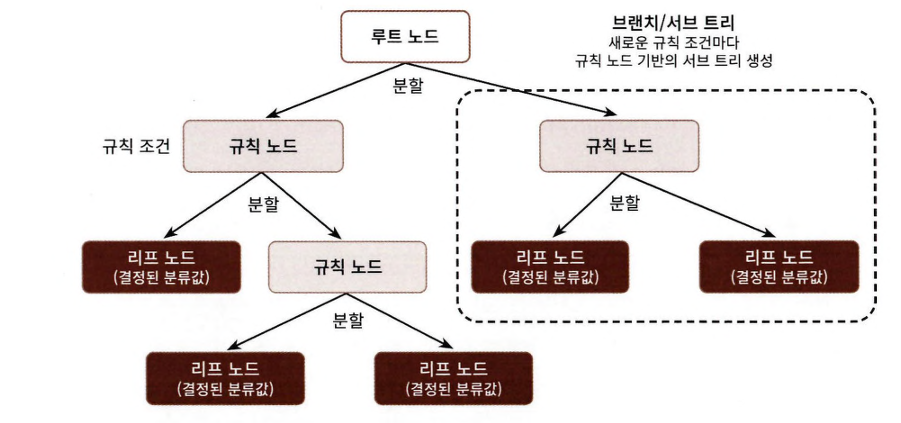

가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
- 이를 위해서는 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요

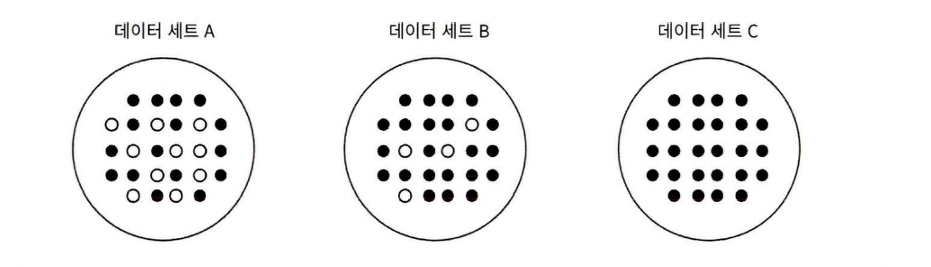

위 그림에서 가장 균일한 데이터 세트부터 순서대로 나열하면, C-B-A

- 데이터 세트의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미침
- 가령 눈을 가린 채 데이터 세트 C에서 하나의 데이터를 뽑았을 때 데이터에 대한 별다른 정보 없이도 '검은 공'이라고 쉽게 예측 가능
- 하지만 A의 경우는 상대적으로 혼잡도가 높고 균일도가 낮기 때문에 같은 조건에서 데이터를 판단하는 데 있어 더 많은 정보가 필요

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦

즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으
로 데이터 값을 예측

- 예를 들어 박스 안에 30개의 레고 블록이 있는데, 각 레고 블록은 '형태' 속성으로 동그라미, 네모, 세모, '색깔' 속성으로 노랑, 빨강, 파랑이 있음
- 이 중 노랑색 블록의 경우 모두 동그라미로 구성되고, 빨강과 파랑 블록의 경우는 동그라미, 네모, 세모가 골고루 섞여 있다고 한다면 각 레고 블록을 형태와 색깔 속성으로 분류하고자 할 때 가장 첫 번째로 만들어져야 하는 규칙 조건은 if 색깔 == '노란색'이 될 것
- 왜냐하면 노란색 블록이면 모두 노란 동그라미 블록으로 가장 쉽게 예측할 수 있고, 그다음 나머지 블록에 대해 다시 균일도 조건을 찾아 분류하는 것이 가장 효율적인 분류 방식이기 때문

이러한 정보의 균일도를 측정하는 대표적인 방법 = **엔트로피를 이용한 정보 이득 지수 & 지니 계수**

- 정보 이득은 엔트로피라는 개념을 기반으로 함
- **엔트로피**는 **주어진 데이터 집합의 혼잡도**를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음
- **정보 이득 지수**는 1에서 엔트로피 지수를 뺀 값
- 즉, **1 - 엔트로피 지수**
- *결정 트리는 이 정보 이득 지수로 분할 기준을 정함*
- 즉, 정보 이득이 높은 속성을 기준으로 분할
- **지니 계수**는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수
- 경제학자인 코라도 지니(Corrado Gini)의 이름에서 딴 계수로서 0이 가장 평등하고 1로 갈수록 불평등
- 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터
균일도가 높은 것으로 해석해, 지니 계수가 낮은 속성을 기준으로 분할

결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할

결정 트리의 일반적인 알고리즘은 데이터 세트를 분할하는 데 가장 좋은 조건, 즉 **정보 이득이 높거나 지니 계수가 낮은 조건**을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정

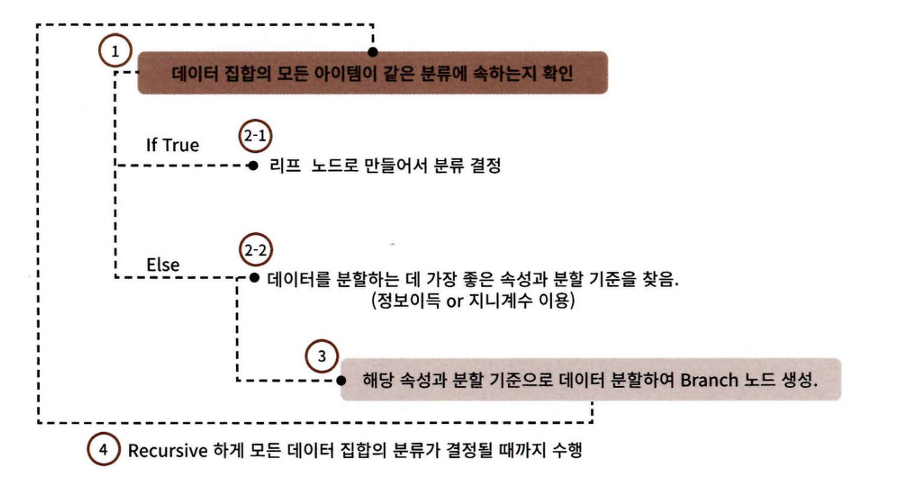

## **< 결정트리 모델의 특징 >**

장점
- 정보의 균일도라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이라는 점
- 결정 트리가 룰이 매우 명확하고, 이에 기반해 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고, 시각화로 표현까지 할 수 있음
- 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음

단점
- 과적합으로 정확도가 떨어진다는 점
- 피처 정보의 균일도에 따른 룰 규칙으로 서브 트리를 게속 만들면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해질 수 밖에 없음
- 모든 데이터 상황을 만족하는 완벽한 규칙은 만들지 못하는 경우가 오히려 더 많음에도 결정 트리는 학습 데이터 기반 모델의 정확도를 높이기 위해 계속해서 조건을 추가하며 트리 깊이가 계속 커지고 결과적으로 복잡한 학습 모델에 이르게 됨
- 복잡한 학습 모델은 실제 상황에 유연하게 대처할 수 없어서 예측 성능이 떨어질 수밖에 없음
- 즉, 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 더 도움됨

## **< 결정 트리 파라미터 >**

사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifieir와 DecisionTreeRegressor 클래스를 제공

DecisionTreeClassifier는 분류를 위한 클래스이며, DecisionTreeRegressor는 회귀를 위한 클래스

사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees) 알고리즘 기반

CART는 분류뿐만 아니라 회귀에서도 사용될 수 있는 트리 알고리즘

 DecisionTreeClassifier와 DecisionTreeRegressor 모두 파라미터는 다음과 같이 동일한 파라미터를 사용

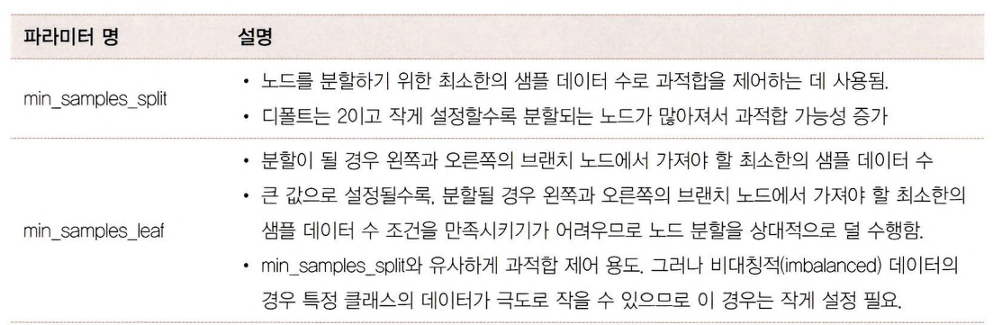

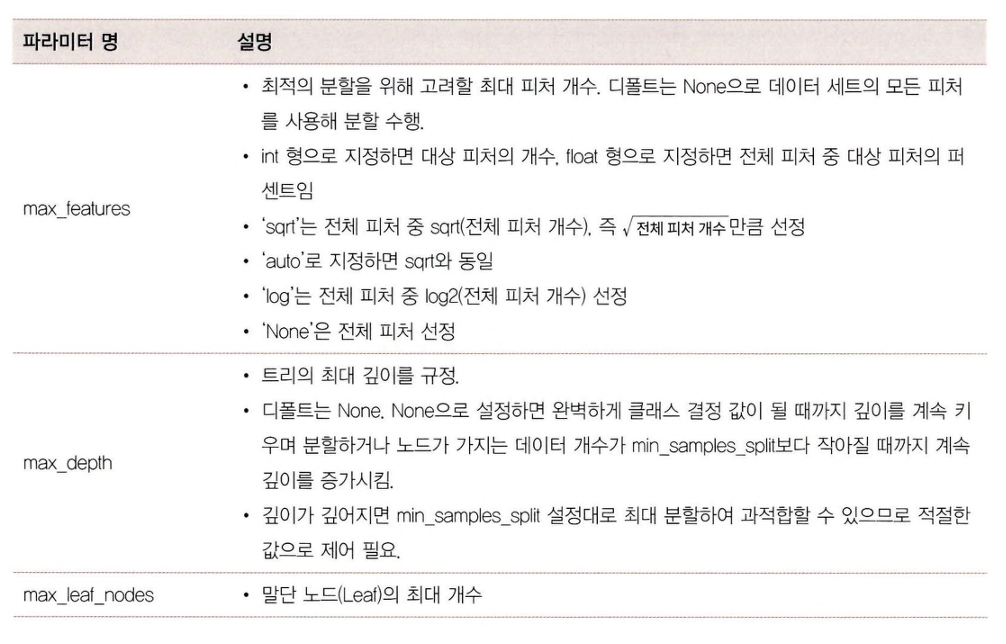

## **< 결정 트리 모델의 시각화 >**

결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 보여줄 수 있는 방법 = Graphviz 패키지

Graphviz는 원래 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지

사이킷런은 이러한 Graphviz 패키지와 쉽게 인터페이스할 수 있도록 export_graphviz() API를 제공

사이킷런의 export_graphviz()는 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여줌

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

export_graphviz()는 Graphviz가 읽어 들여서 그래프 형태로 시각화할 수 있는 출력 파일을 생성

export_graphviz( )에 인자로 학습이 완료된 estimator, output 파일 명, 결정 클래스의 명칭, 피처의 명칭을 입력해주면 됨

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

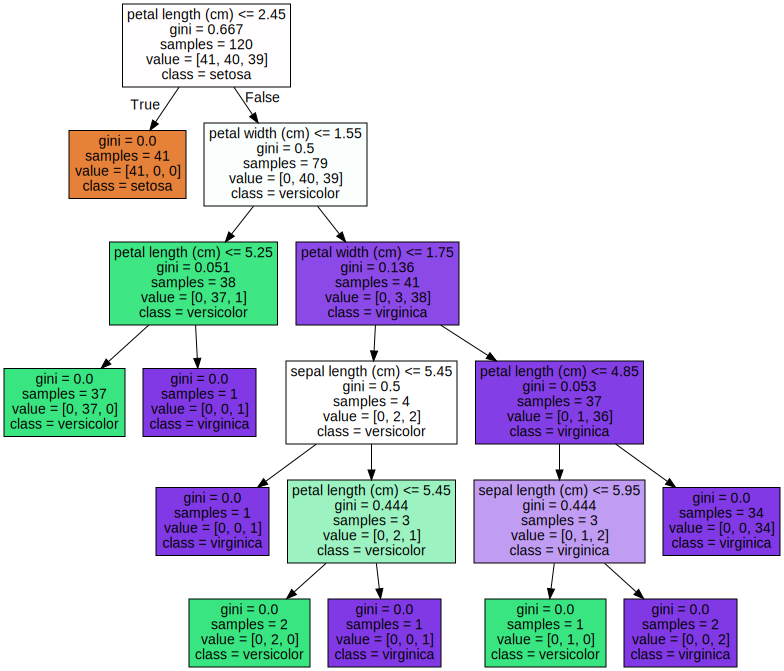

In [ ]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

- 더이상 자식 노드가 없는 노드 = 리프 노드
- 리프 노드 = 최종 클래스 값이 결정되는 노드

리프노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 됨

- 자식 노드가 있는 노드 = 브랜치 노드

<노드 내 기술된 지표의 의미>
- petal length(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건
- 이 조건이 없으면 리프 노드
- gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수
- samples는 현 규칙에 해당하는 데이터 건수
- value = []는 클래스 값 기반의 데이터 건수
- 붓꽃 데이터 세트는 클래스 값으로 0, 1. 2를 가지고 있으며, 0: Setosa, 1: Versicolor, 2: Virginica 품종
- 만일 Value = [41,40,39]라면 클래스 값의 순서로 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터가 구성돼 있다는 의미

결정트리 알고리즘을 제어하는 대부분 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도

- max_depth
- min_samples_splits : 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수
- min_samples_leaf : 어떤 노드가 분할할 경우, 왼쪽과 오른쪽 자식 노드 중에 하나라도 min_samples_leaf로 지정된 최소 데이터 건수보다 더 작은 샘플 데이터 건수를 갖게 된다면, 해당 노드는 더 이상 분할하지 않고 리프 노드가 됨

사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 feature_importances_ 속성으로 제공


**< feature_importances_ >**
- ndarray 형태로 값을 반환
- 피처 순서대로 값 할당
- 피처가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값으로 표현한 것
- ex. feature_importances_가 [0.01667014 0.02500521 0.03200643 0.92631822]라면 첫 번째 피처의 피처 중요도가 0.01667014, 두 번째 피처는 0.02500521와 같이 매치

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

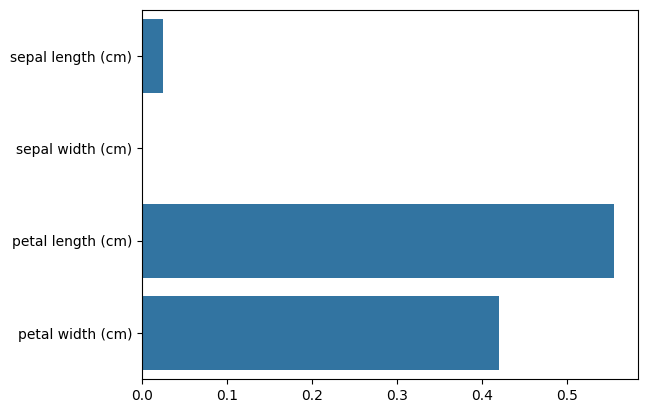

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
# zip() : 두 개의 리스트를 쌍(pair)으로 묶음
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

## **< 결정 트리 과적합 >**

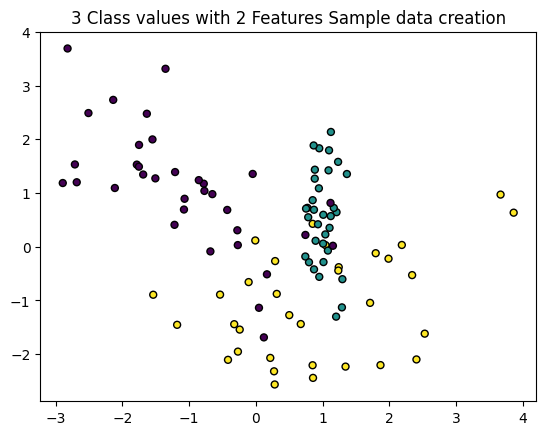

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

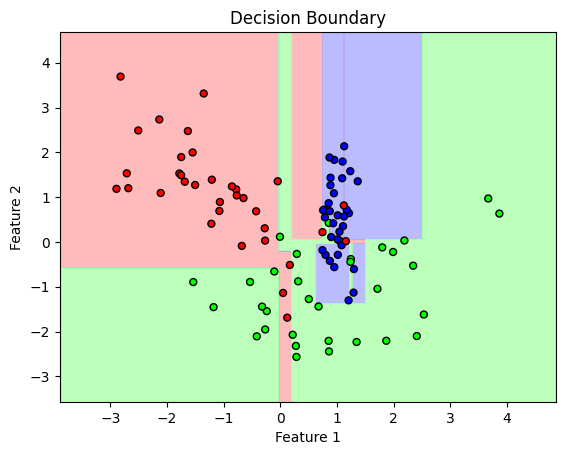

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

def visualize_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=25, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf=DecisionTreeClassifier(random_state=156).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

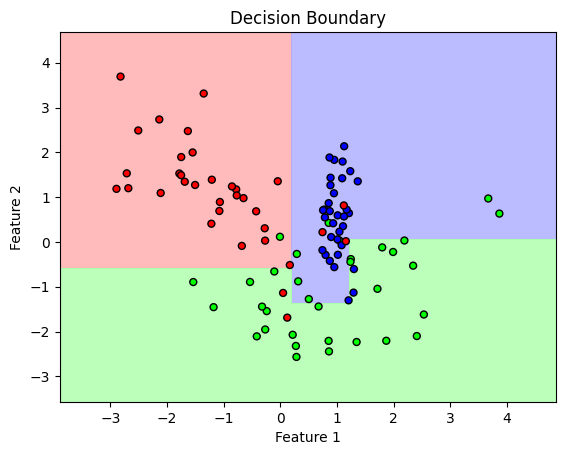

In [ ]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf=DecisionTreeClassifier(min_samples_leaf=6,random_state=156).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있기에 이를 DataFrame으로 로드
feature_name_df=pd.read_csv("/content/drive/MyDrive/ESAA/features.txt",sep='\s+',
                            header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:',feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [ ]:
# 중복된 피처명 확인
feature_dup_df=feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


- 총 42개의 피처명이 중복
- 이 중복된 피처명에 대해서는 원본 피처명에 _1또는 _2를 추가로 부여해 새로운 피처명을 가지는 DataFrame을 반환하는 함수인 get_new_feature_name_df()를 생성

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                columns = ['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how = 'outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                            'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                            if x[1]>0 else x[0],axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'],axis = 1)
  return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset():
  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
  feature_name_df=pd.read_csv("/content/drive/MyDrive/ESAA/features.txt", sep='\s+',
                            header = None, names = ['column_index','column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv("/content/drive/MyDrive/ESAA/X_train.txt",sep='\s+',
                      header=None,names=feature_name)
  X_test=pd.read_csv("/content/drive/MyDrive/ESAA/X_test.txt",sep='\s+',
                      header=None,names=feature_name)
  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train=pd.read_csv("/content/drive/MyDrive/ESAA/y_train.txt",sep='\s+',
                      header=None,names=['action'])
  y_test=pd.read_csv("/content/drive/MyDrive/ESAA/y_test.txt",sep='\s+',
                      header=None,names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

결정 트리 예측 정확도:0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth':[6,8,10,12,16,20,24],
    'min_samples_split':[16]
}

grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [ ]:
max_depths = [6,8,10,12,16,20,24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth = depth,random_state = 156)
  dt_clf.fit(X_train,y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test,pred)
  print('max_depth={0} 정확도:{1:.4f}'.format(depth,accuracy))

max_depth=6 정확도:0.8558
max_depth=8 정확도:0.8707
max_depth=10 정확도:0.8673
max_depth=12 정확도:0.8646
max_depth=16 정확도:0.8575
max_depth=20 정확도:0.8548
max_depth=24 정확도:0.8548


max_depth가 8일 경우 약 87.17%로 가장 높은 정확도를 나타냈고 max_depth가 8을 넘어가면서 정확도가 계속 감소

이처럼 결정 트리는 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이퍼 파라미터를 이용해 깊이를 제어할 수 있어야 함

복잡한 모델보다도 트리 깊이를 낮춘 단순한 모델이 더욱 효과적인 결과를 가져올 수 있음

In [ ]:
params = {
   'max_depth':[8,12,16,20],
   'min_samples_split':[16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


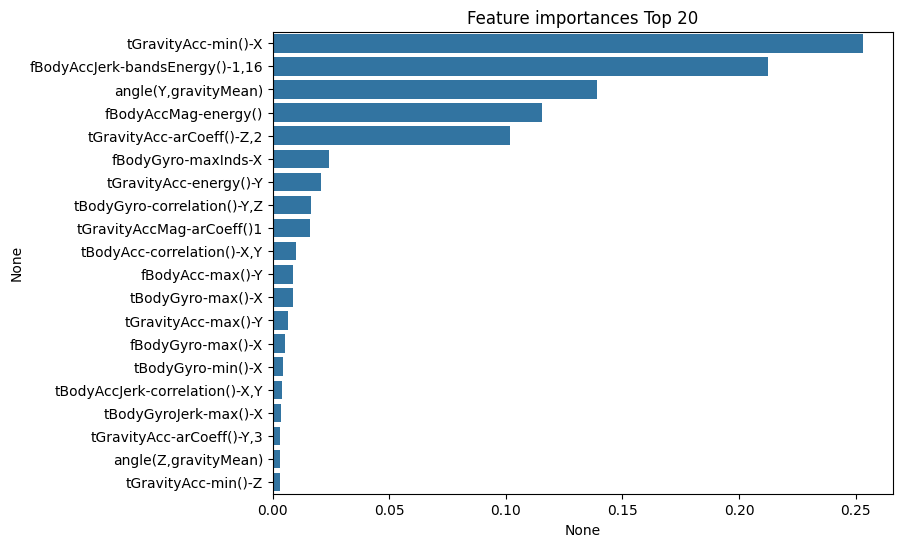

In [ ]:
## 중요도가 높은 순으로 Top 20 피처를 막대그래프로 표현

import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)

plt.show()